# Importing the libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Loading the dataset

In [69]:
# the files present in input folder
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [70]:
df = pd.read_csv('Parkinson.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Knowing the dataset

In [71]:
# size of the dataset
print("There are {0} records and {1} columns in the dataset.".format(df.shape[0],df.shape[1]))

# overview of the dataset
print("\n--Overview of the dataset--")
print(df.info())

# descriptive stats
print("\n--Statistical summary of the dataset--")
print(df.describe())

# null values
print("\n--Null Values in the dataset--")
print(df.isnull().sum())
print("\nIn total we have {0} number of null values.".format(df.isnull().sum().sum()))

There are 195 records and 24 columns in the dataset.

--Overview of the dataset--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR      

Inference:

1. We are not having any null values in the dataset.
2. There are a total of 195 patient records and 24 features.
3. All of the feature are numeric except the name which has no use in prediction.

## Analysing target variable

**"status"** column is the target variable.

1 --> indicates that the patient has parkinson disease

0 --> indicates no parkinson disease

In [72]:
# number of class instances
df.value_counts('status')

status
1    147
0     48
dtype: int64

<AxesSubplot:xlabel='status', ylabel='count'>

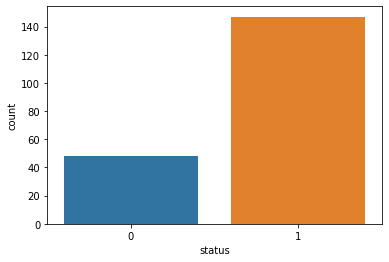

In [73]:
# plotting the class instances
sns.countplot(data = df, x = df['status'])

## Correlations

### Correlatios among features

<AxesSubplot:>

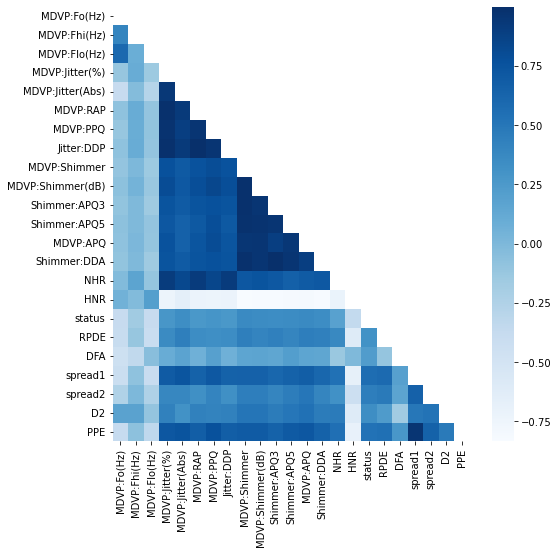

In [74]:
# correlation matrix
corr = df.corr()
# using mask
mask = np.triu(corr)
# adjusting size of the figure 
plt.figure(figsize=(8,8))
# plotting heatmap by applying mask
sns.heatmap(corr, mask=mask, cmap='Blues')

# Splitting the dataset

In [75]:
# splitting the features in X and traget variable in y
X = df.drop(columns=['name','status']).values
y = df.status.values

In [76]:
# splitting the data into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Training the model

I have tried many models included **Logistic Regression,Naive Baye's, Kernel SVM, Decision Tree, and Random Forest** but I got the best results with **XGBoost** method.

However, as we have data in different scales, for the **Logistic Regression and Support Vector Machine classifiers**, first we have to do the **Feature Engineering (i.e., Standardizing)** the data before feeding it to the machine learning models.

### Feature engineering for Logistic Regression and SVM models

In [77]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)

### 1. Logistic Regression

In [78]:
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression()
# clf.fit(X_train, y_train)

### 2. Kernel SVM

In [79]:
# from sklearn.svm import SVC
# clf = SVC()
# clf.fit(X_train, y_train)

### 3. Decision Tree

In [80]:
 from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### 4. Naive Baye's

In [81]:
# from sklearn.naive_bayes import GaussianNB
# clf = GaussianNB()
# clf.fit(X_train, y_train)

### 5. Random Forest

In [82]:
#from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(n_estimators=100, random_state=0)
#clf.fit(X_train, y_train)

### 6. XGBoost

In [83]:
#from xgboost import XGBClassifier
#clf = XGBClassifier()
#clf.fit(X_train, y_train)

# Evaluating the model

Use the commented part to predict if you use Logistic Regression or SVM models

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix

# predicting the test dataset
"""Do standardize the test data also incase of the Logistic Regression or SVM model"""
# X_test = sc.transform(X_test)
y_pred = clf.predict(X_test)



# evaluating the model
print('Accuracy of the model is {:.2f} %'.format(accuracy_score(y_test, y_pred)*100))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy of the model is 74.36 %
Confusion Matrix:
 [[ 7  3]
 [ 7 22]]


# Extracting the model

Now let us extract the model that we have built and trying to predict using a single observation.

In [85]:
import pickle

In [86]:
# saving the model
with open('ml_model','wb') as f:
    pickle.dump(clf, f)

In [87]:
# loading the saved model
with open('ml_model','rb') as f:
    model = pickle.load(f)

## Single prediction

In [88]:
input_data = (95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571)
input_data = np.asarray(input_data)

#reshaping the numpy array 
input_data = input_data.reshape(1,-1)

"""Uncomment the below line incase of the Logistic Regression or SVM model"""
# input_data = sc.transform(input_data)


# predicting
try:
    pred = model.predict(input_data)
    if pred[0] == 1:
        print('The patient has Parkinson disease.')
    elif pred[0] == 0:
        print('The patient is free from Parkinson disease.')
except:
    print('Error occured in the model.')

The patient has Parkinson disease.
